<a href="https://colab.research.google.com/github/neilrosario27/MNIST_NN/blob/main/NN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries & Dataset**

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [154]:
data = pd.read_csv('mnist_test.csv')

In [155]:
data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [156]:
data.shape

(10000, 785)

In [157]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

**Weights and Biases**

In [158]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

**Forward Propogation**

In [159]:
def ReLU(Z):
    return np.maximum(Z, 0)

In [160]:
def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

In [161]:
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

**Backward Propogation**

In [162]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

In [163]:
def ReLU_deriv(Z):
    return Z > 0

In [164]:
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    m = Y.size
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

**Update Parameters**

In [165]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

**Build the Neural Network**

In [166]:
def get_predictions(A2):
    return np.argmax(A2, 0)

In [167]:
def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

In [183]:
def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 50 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

**Run the Neural Network**

In [184]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 1001)

Iteration:  0
[3 1 1 ... 7 2 1] [0 2 9 ... 7 8 8]
0.16844444444444445
Iteration:  50
[1 2 7 ... 7 8 8] [0 2 9 ... 7 8 8]
0.5413333333333333
Iteration:  100
[0 2 7 ... 7 8 8] [0 2 9 ... 7 8 8]
0.7133333333333334
Iteration:  150
[0 2 9 ... 7 8 8] [0 2 9 ... 7 8 8]
0.7834444444444445
Iteration:  200
[0 2 9 ... 7 8 8] [0 2 9 ... 7 8 8]
0.8175555555555556
Iteration:  250
[0 2 9 ... 7 8 8] [0 2 9 ... 7 8 8]
0.8356666666666667
Iteration:  300
[0 2 9 ... 7 8 8] [0 2 9 ... 7 8 8]
0.8504444444444444
Iteration:  350
[0 2 9 ... 7 8 8] [0 2 9 ... 7 8 8]
0.8588888888888889
Iteration:  400
[0 2 9 ... 7 8 8] [0 2 9 ... 7 8 8]
0.8671111111111112
Iteration:  450
[0 2 9 ... 7 8 8] [0 2 9 ... 7 8 8]
0.8725555555555555
Iteration:  500
[0 2 9 ... 7 8 8] [0 2 9 ... 7 8 8]
0.8766666666666667
Iteration:  550
[0 2 9 ... 7 8 8] [0 2 9 ... 7 8 8]
0.8807777777777778
Iteration:  600
[0 2 9 ... 7 8 8] [0 2 9 ... 7 8 8]
0.8837777777777778
Iteration:  650
[0 2 9 ... 7 8 8] [0 2 9 ... 7 8 8]
0.8856666666666667
Iteratio

**Testing  the Neural Network**

In [186]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

In [187]:
def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [0]
Label:  0


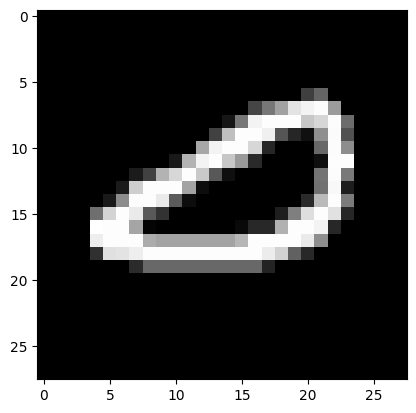

In [188]:
test_prediction(0, W1, b1, W2, b2)

Prediction:  [5]
Label:  5


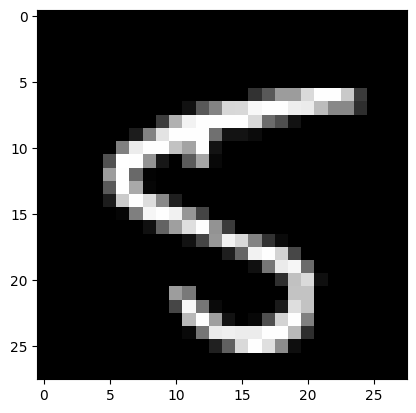

In [189]:
test_prediction(3, W1, b1, W2, b2)